In [158]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [159]:
from sklearn.datasets import load_breast_cancer

In [160]:
X = load_breast_cancer(True)[0]
y = load_breast_cancer(True)[1]
minn = 6
maxx = 8
X = X[:,minn:maxx] 
X.shape  # Just Using two Features 
# As we can plot 2 features easily 

(569, 2)

# Decsion Tree

In [161]:
from sklearn.tree import DecisionTreeClassifier

In [162]:
clf = DecisionTreeClassifier()
clf.fit(X,y)
clf.predict(X[1:5])

array([0, 0, 0, 0])

In [163]:
from sklearn.metrics import accuracy_score

accuracy_score(y,y_pred)

0.9279437609841827

# Randsom Forest 

In [173]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [179]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=100,
    max_samples=100, bootstrap=True, random_state=42
)


In [180]:
bag_clf.fit(X, y)
y_pred = bag_clf.predict(X)

In [181]:
from sklearn.metrics import accuracy_score

accuracy_score(y,y_pred)

0.9244288224956063

# Now Lets Try Plotting

In [182]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[X[minn].min(), X[minn].max(), y.min(), 0.1] , alpha=0.5, contour=True):
    
    # Creatin a Mesh Grid
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    
    x1, x2 = np.meshgrid(x1s, x2s)
    
    
    # c_ add along second axis
    # ravel is alterative of reshape(-1)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    # Ploting X and y Points 
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

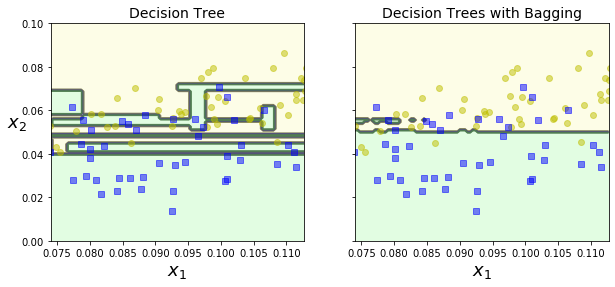

In [183]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])

plot_decision_boundary(clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])

plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
# save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()